# Prever qualidade do vinho de 1 a 10 usando 11 caracteristicas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style('whitegrid')

## Importação dos dados


In [6]:
data_frame = pd.read_csv('winequality-red.csv', sep= ";")

In [7]:
display(data_frame)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


###

In [8]:
data_frame.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Análise exploratoria dos dados


(array([  3.,  20.,  22.,  42.,  59., 128., 212., 186., 144., 153.,  96.,
        122.,  55.,  55.,  78.,  58.,  31.,  21.,  33.,  23.,  20.,  13.,
          8.,   5.,   4.,   1.,   0.,   2.,   2.,   3.]),
 array([ 4.6       ,  4.97666667,  5.35333333,  5.73      ,  6.10666667,
         6.48333333,  6.86      ,  7.23666667,  7.61333333,  7.99      ,
         8.36666667,  8.74333333,  9.12      ,  9.49666667,  9.87333333,
        10.25      , 10.62666667, 11.00333333, 11.38      , 11.75666667,
        12.13333333, 12.51      , 12.88666667, 13.26333333, 13.64      ,
        14.01666667, 14.39333333, 14.77      , 15.14666667, 15.52333333,
        15.9       ]),
 <BarContainer object of 30 artists>)

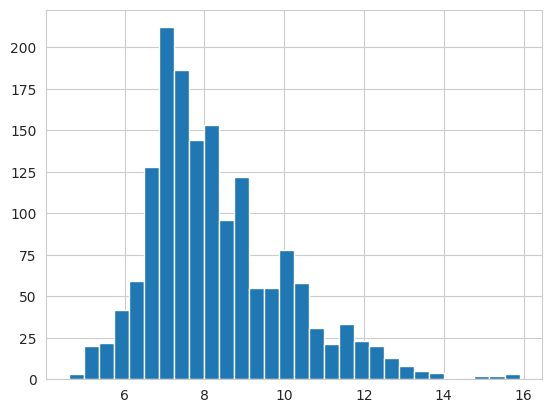

In [9]:
plt.hist(data_frame['fixed acidity'], bins=30)

(array([  5.,  21.,  47., 102., 135., 168., 153., 128., 142., 197., 160.,
        118.,  71.,  48.,  29.,  26.,  13.,  12.,  14.,   2.,   2.,   2.,
          0.,   1.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([0.12      , 0.16866667, 0.21733333, 0.266     , 0.31466667,
        0.36333333, 0.412     , 0.46066667, 0.50933333, 0.558     ,
        0.60666667, 0.65533333, 0.704     , 0.75266667, 0.80133333,
        0.85      , 0.89866667, 0.94733333, 0.996     , 1.04466667,
        1.09333333, 1.142     , 1.19066667, 1.23933333, 1.288     ,
        1.33666667, 1.38533333, 1.434     , 1.48266667, 1.53133333,
        1.58      ]),
 <BarContainer object of 30 artists>)

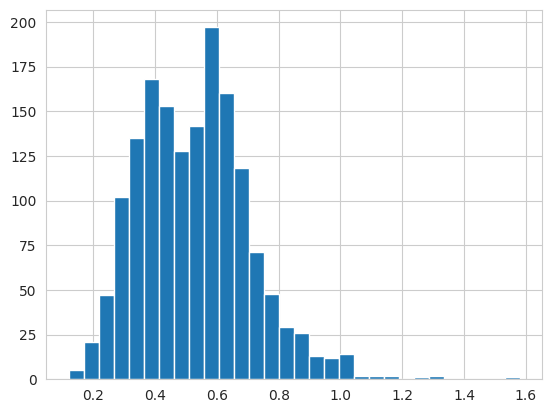

In [10]:
plt.hist(data_frame['volatile acidity'], bins=30)

## Aqui encontramos um problema, como o acído volatil de um vinho tinto não pode passar de 1.2 g/L (gramas/Litro), tenho que fazer algo? ou isso só torna o vinho ruim? pois a partir desse valor o vinho começa a virar vinagre


(array([245.,  73.,  85.,  95.,  49.,  59., 110., 116.,  60., 117.,  57.,
         61.,  89.,  64., 109.,  64.,  33.,  26.,  22.,  30.,  17.,   7.,
          8.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

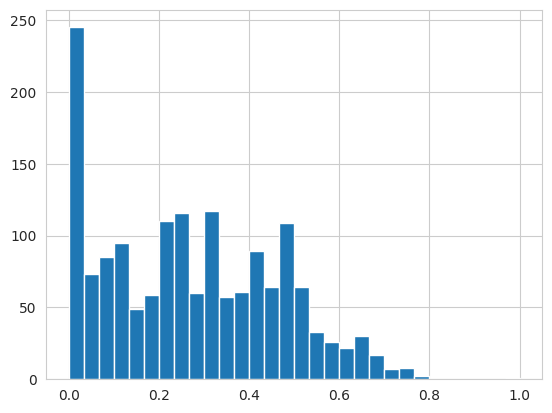

In [11]:
plt.hist(data_frame['citric acid'], bins=30)

(array([ 15., 332., 647., 339.,  84.,  40.,  37.,  17.,  13.,  16.,  18.,
         11.,   2.,   2.,   7.,   4.,   4.,   0.,   0.,   0.,   3.,   0.,
          0.,   0.,   1.,   1.,   3.,   0.,   0.,   3.]),
 array([ 0.9       ,  1.38666667,  1.87333333,  2.36      ,  2.84666667,
         3.33333333,  3.82      ,  4.30666667,  4.79333333,  5.28      ,
         5.76666667,  6.25333333,  6.74      ,  7.22666667,  7.71333333,
         8.2       ,  8.68666667,  9.17333333,  9.66      , 10.14666667,
        10.63333333, 11.12      , 11.60666667, 12.09333333, 12.58      ,
        13.06666667, 13.55333333, 14.04      , 14.52666667, 15.01333333,
        15.5       ]),
 <BarContainer object of 30 artists>)

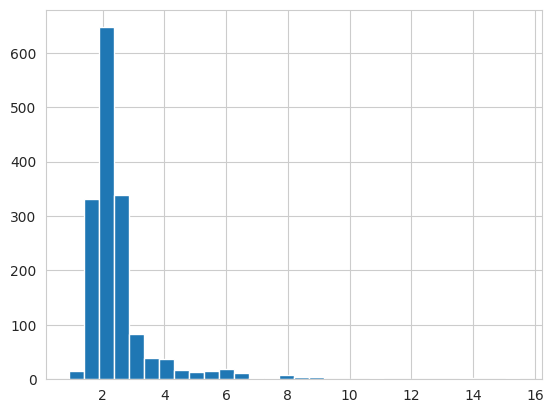

In [12]:
plt.hist(data_frame['residual sugar'], bins=30)

(array([  3.,   4.,  30.,  98., 162., 255., 127., 117.,  79., 110.,  56.,
         91., 123.,  64.,  45.,  52.,  42.,  25.,  46.,  15.,  26.,   8.,
          4.,   9.,   0.,   7.,   0.,   0.,   0.,   1.]),
 array([ 8.4       ,  8.61666667,  8.83333333,  9.05      ,  9.26666667,
         9.48333333,  9.7       ,  9.91666667, 10.13333333, 10.35      ,
        10.56666667, 10.78333333, 11.        , 11.21666667, 11.43333333,
        11.65      , 11.86666667, 12.08333333, 12.3       , 12.51666667,
        12.73333333, 12.95      , 13.16666667, 13.38333333, 13.6       ,
        13.81666667, 14.03333333, 14.25      , 14.46666667, 14.68333333,
        14.9       ]),
 <BarContainer object of 30 artists>)

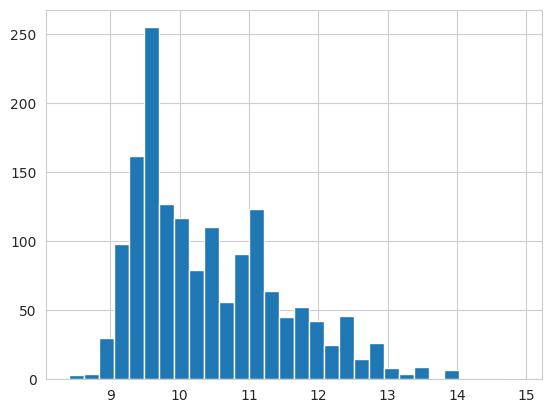

In [13]:
plt.hist(data_frame['alcohol'], bins=30)

<Axes: >

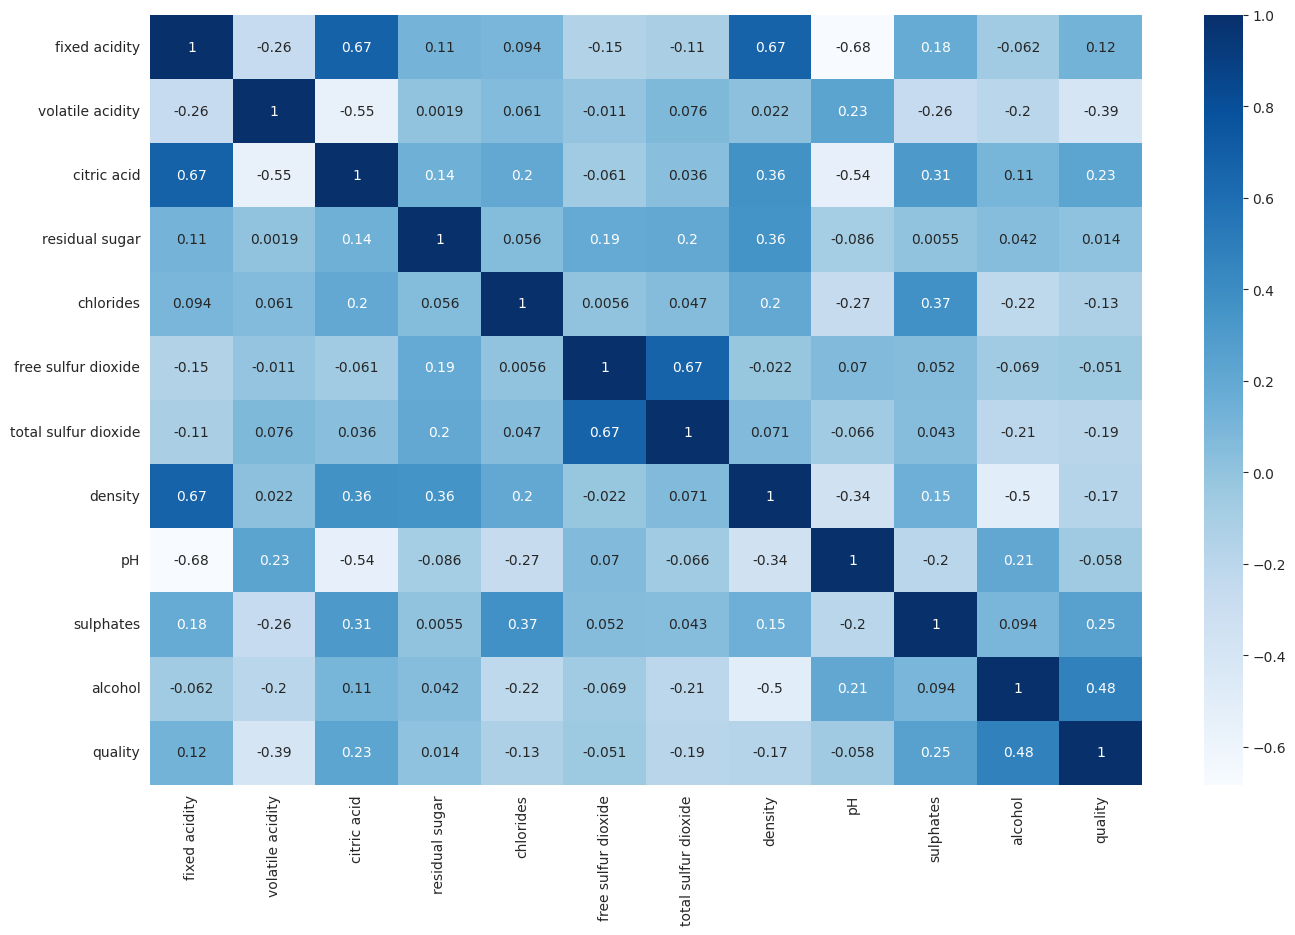

In [15]:
plt.figure(figsize = (16, 10))
sns.heatmap(data_frame.corr(), annot = True, cmap = 'Blues')

### Criando modelo de regressão linear


In [ ]:
#Dividindo entre conjunto de treinamento e de teste
X = data_frame.drop('quality', axis=1)
y = data_frame['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
#Criando modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Fazendo previsão
y_pred = model.predict(X_test)

In [ ]:
#Avaliando desempenho
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse * 100

41.12348717504204